# Titanic Survival Prediction - Exploratory Data Analysis
## Objectives
1. Understand dataset structure and features
2. Identify missing values and patterns
3. Analyze feature distributions and relationships
4. Generate insights for feature engineering

In [78]:
# Import required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Set style for better visualizations
sns.set_style("whitegrid")
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 6]

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [79]:
# Load data
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

print("Training set shape:", train.shape)
print("Test set shape:", test.shape)

# Display first few rows and data 
display(train.head())
train.info()

Training set shape: (891, 12)
Test set shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1. Missing Values Analysis

Missing Values Summary


,Missing Values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


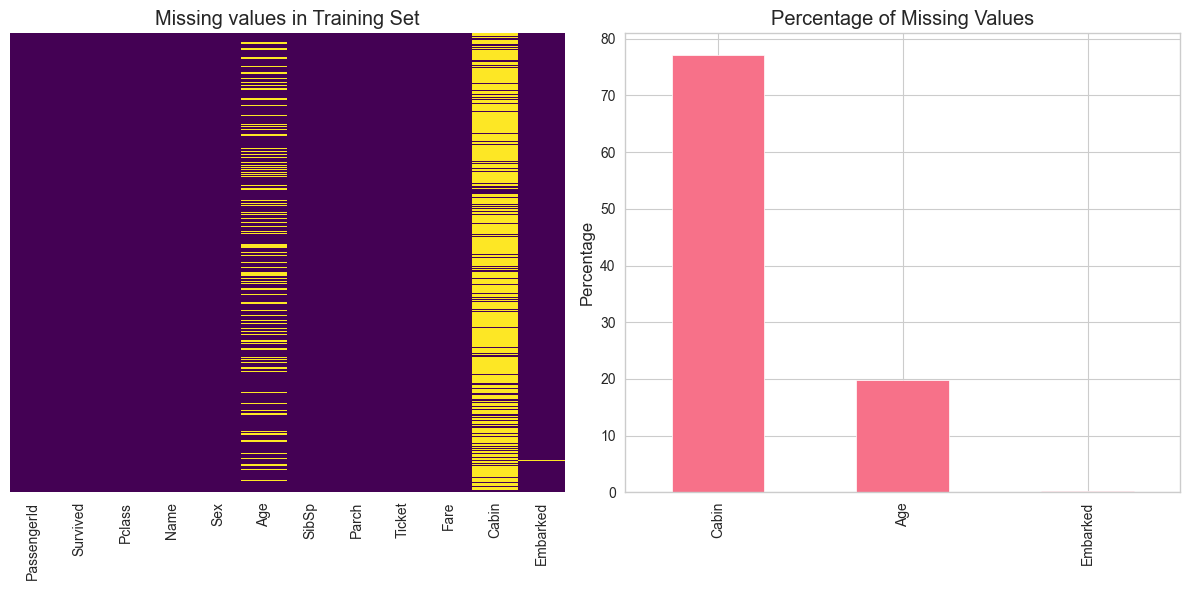

In [80]:
def analyze_missing_values(df, titel):
    # Caculate missing values
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_percent
    })
    missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

    # Plot missing values
    #plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title(f'Missing values in {titel}')

    plt.subplot(122)
    missing_df['Percentage'].plot(kind='bar')
    plt.title('Percentage of Missing Values')
    plt.ylabel('Percentage')
    plt.tight_layout()

    return missing_df

missing_train = analyze_missing_values(train, 'Training Set')
print('Missing Values Summary')
display(missing_train)


## 2. Survival Rate Analysis

Survival Rate by Pclass:
Pclass
1    0.630
2    0.473
3    0.242
Name: Survived, dtype: float64
Survival Rate by Sex:
Sex
female    0.742
male      0.189
Name: Survived, dtype: float64
Survival Rate by Embarked:
Embarked
C    0.554
Q    0.390
S    0.337
Name: Survived, dtype: float64


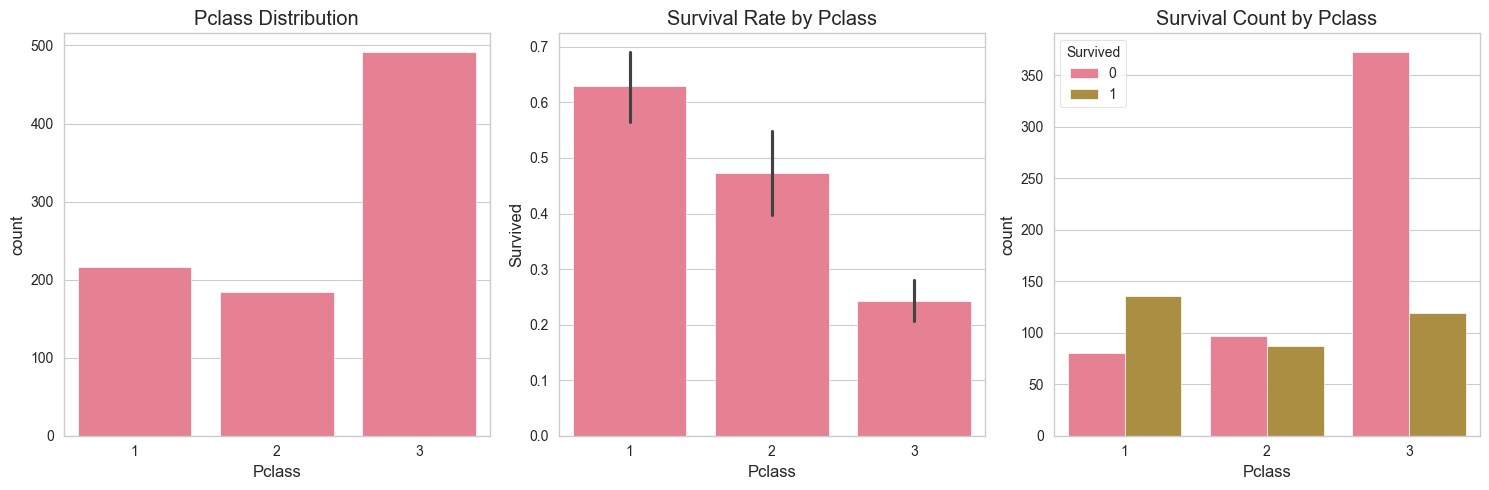

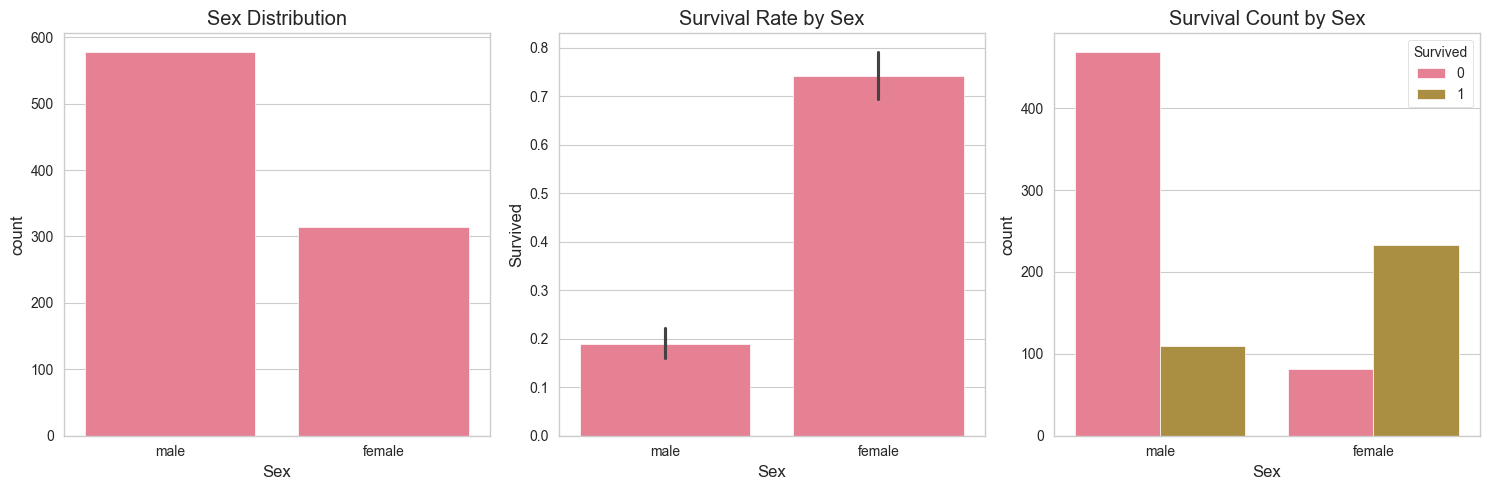

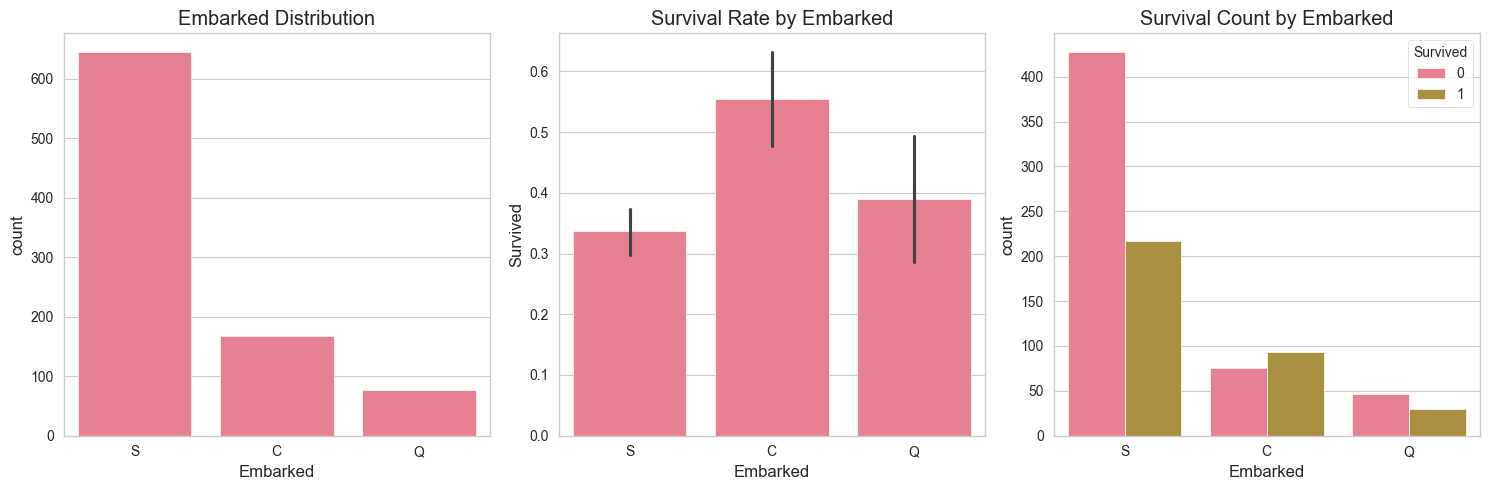

In [81]:
def plot_survival_rate(feature, df=train):
    plt.figure(figsize=(15, 5))

    # Distribution
    plt.subplot(131)
    sns.countplot(data=df, x=feature)
    plt.title(f'{feature} Distribution')

    # Survival Rate
    plt.subplot(132)
    sns.barplot(data=df, x=feature, y='Survived')
    plt.title(f'Survival Rate by {feature}')

    # Count with Survival
    plt.subplot(133)
    sns.countplot(data=df, x=feature, hue='Survived')
    plt.title(f'Survival Count by {feature}')

    plt.tight_layout()

    # Print statistics
    print(f'Survival Rate by {feature}:')
    print(df.groupby(feature)['Survived'].mean().round(3))

# Analyze key features
for feature in ['Pclass', 'Sex', 'Embarked']:
    plot_survival_rate(feature)


## 3. Age Analysis

Survival rate by age group:
AgeGroups
Child          0.580
Teen           0.429
Young Adult    0.383
Adult          0.399
Senior         0.344
Name: Survived, dtype: float64


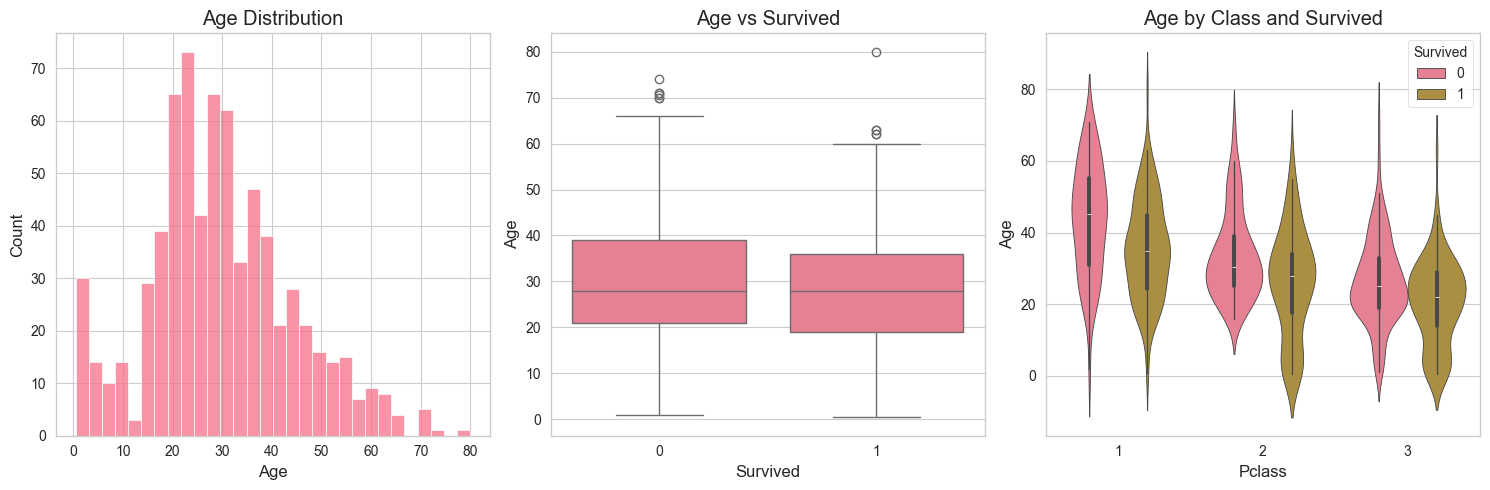

In [82]:
plt.figure(figsize=(15,5))

# Age distribution
plt.subplot(131)
sns.histplot(data=train, x='Age', bins=30)
plt.title('Age Distribution')

# Age vs Survival
plt.subplot(132)
sns.boxplot(data=train, y='Age', x='Survived')
plt.title('Age vs Survived')

# Age by Class and Survived
plt.subplot(133)
sns.violinplot(data=train, y='Age', x='Pclass', hue='Survived')
plt.title('Age by Class and Survived')

plt.tight_layout()

# Create age groups and analyze survival rates
train['AgeGroups'] = pd.cut(train['Age'],
                            bins = [0, 12, 18, 35, 50, 100],
                            labels= ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

print('Survival rate by age group:')
print(train.groupby('AgeGroups')['Survived'].mean().round(3))


## 4. Family Size Analysis

Survival rate by family size:
FamilySize
1     0.304
2     0.553
3     0.578
4     0.724
5     0.200
6     0.136
7     0.333
8     0.000
11    0.000
Name: Survived, dtype: float64


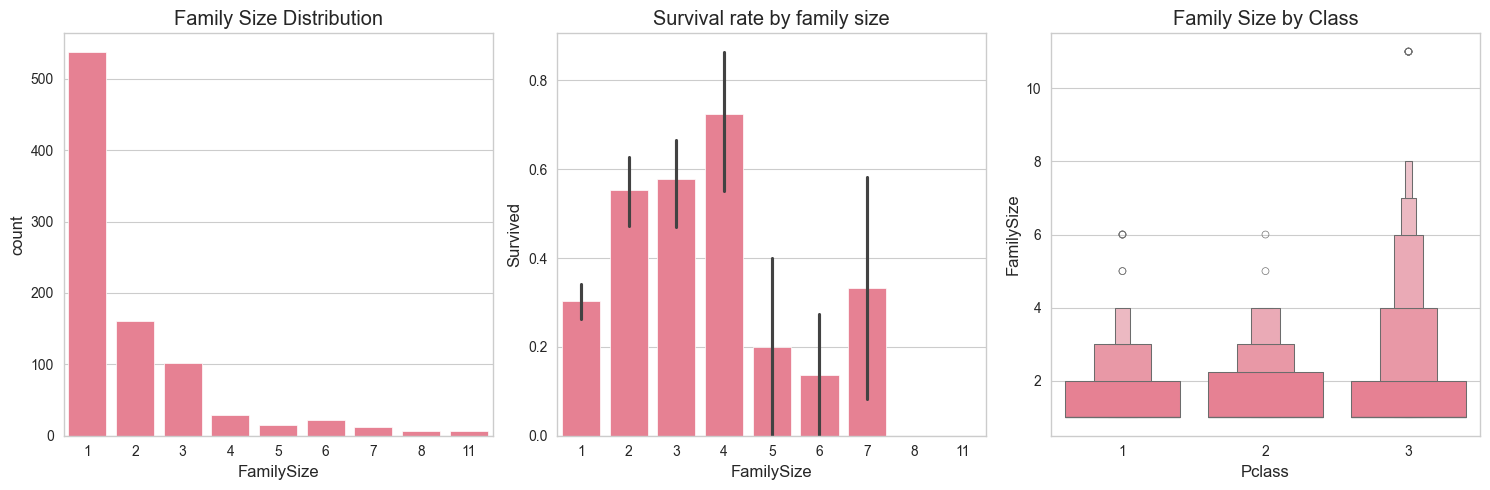

In [83]:
# Create family size feature

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

plt.figure(figsize=(15,5))

# Family size distribution
plt.subplot(131)
sns.countplot(data=train, x='FamilySize')
plt.title('Family Size Distribution')

# Survival rate by family size
plt.subplot(132)
sns.barplot(data=train, x='FamilySize', y='Survived')
plt.title('Survival rate by family size')

# Family size by Class
plt.subplot(133)
sns.boxenplot(data=train, x='Pclass', y='FamilySize')
plt.title('Family Size by Class')

plt.tight_layout()

print('Survival rate by family size:')
print(train.groupby('FamilySize')['Survived'].mean().round(3))

## 5. Fare Analysis

Survival Rate by Fare Bin
FareBin
Low          0.197
Medium       0.304
High         0.455
Very High    0.581
Name: Survived, dtype: float64


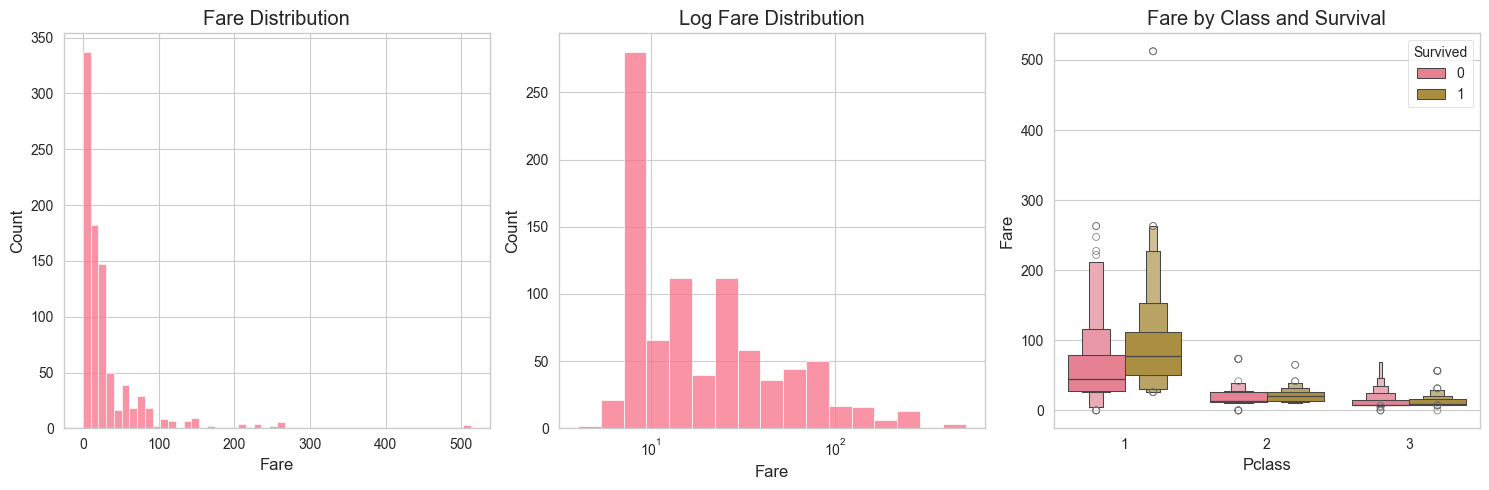

In [84]:
plt.figure(figsize=(15,5))

# Fare distribution
plt.subplot(131)
sns.histplot(data=train, x='Fare', bins=50)
plt.title('Fare Distribution')

# Log fare distribution
plt.subplot(132)
sns.histplot(data=train, x='Fare', log_scale=True)
plt.title('Log Fare Distribution')

# Fare by class and survival
plt.subplot(133)
sns.boxenplot(data=train, x='Pclass', y='Fare', hue='Survived')
plt.title('Fare by Class and Survival')

plt.tight_layout()

# Create fare bins
train['FareBin'] = pd.qcut(train['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print('Survival Rate by Fare Bin')
print(train.groupby('FareBin')['Survived'].mean().round(3))

## 6. Title Analysis from Names

Survival Rate by Title:
Title
Master    0.575
Miss      0.698
Mr        0.157
Mrs       0.792
Rare      0.444
Name: Survived, dtype: float64


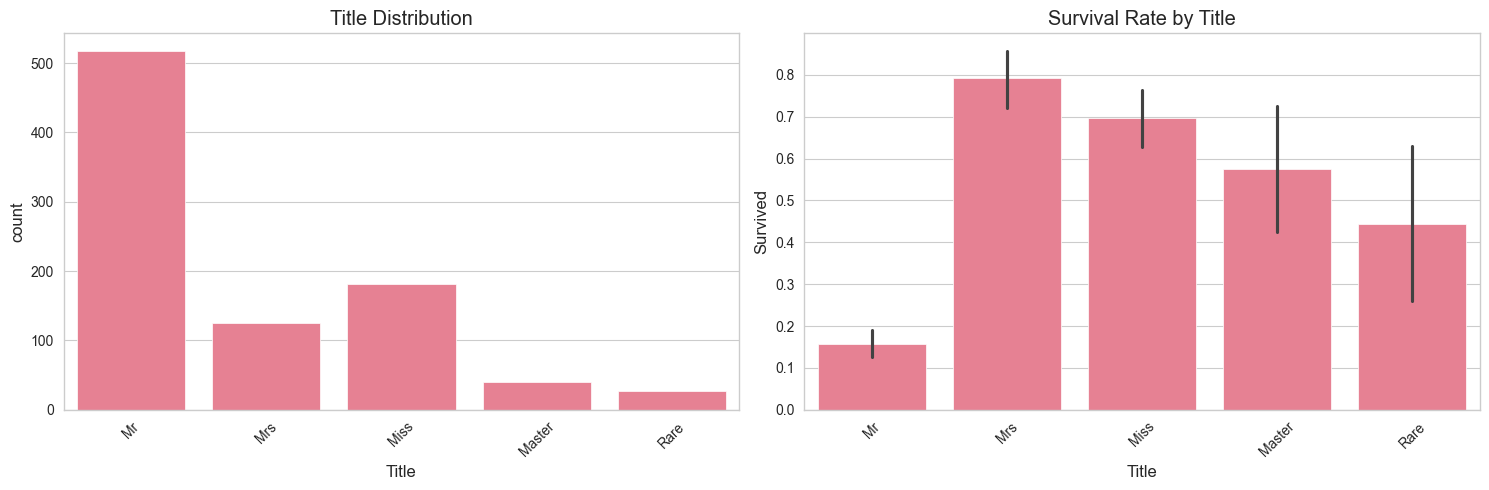

In [85]:
# Extract titels from names
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

# Group rare titles
rare_titles = train['Title'].value_counts()[train['Title'].value_counts() < 10].index
train['Title'] = train['Title'].replace(rare_titles, 'Rare')

plt.figure(figsize=(15,5))

# Title Distribution
plt.subplot(121)
sns.countplot(data=train, x='Title')
plt.xticks(rotation=45)
plt.title('Title Distribution')

# Survival rate by Title
plt.subplot(122)
sns.barplot(data=train, x='Title', y='Survived')
plt.xticks(rotation=45)
plt.title('Survival Rate by Title')

plt.tight_layout()

print('Survival Rate by Title:')
print(train.groupby('Title')['Survived'].mean().round(3))




## 7. Correlation Analysis

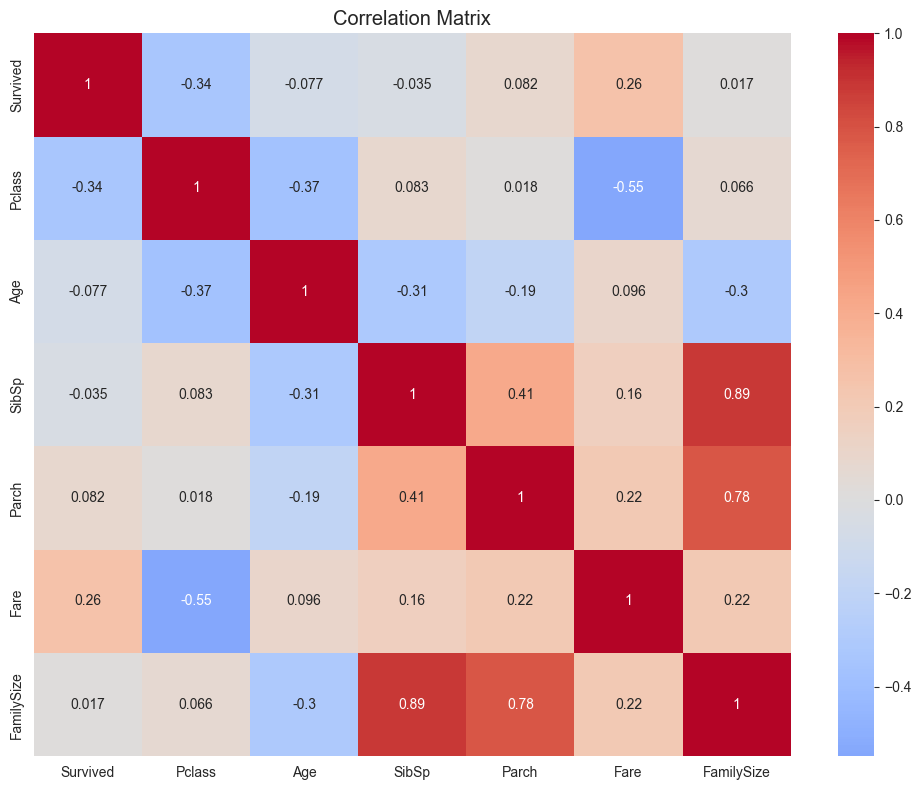

In [86]:
# Create correlation matrix 
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
correlation_matrix = train[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()

## 8. Key Findings and Feature Engineering Ideas

 1. Missing Values:
    - Age: ~20% missing - need imputation strategy
    - Cabin: ~77% missing - extract deck information
    - Embarked: <1% missing - can use mode

2. Strong Survival Indicators:
    - Sex: Females had much higher survival rates
    - Pclass: Higher classes had better survival rates
    - Age: Children had higher survival rates
    - Title: Different titles show varying survival rates

3. Feature Engineering Ideas
    - Create age groups
    - Family size categories
    - Fare bins
    - Title grouping
    - Extract deck from cabin
    - Create is_alone flag

4. Preprocessing Needs
    - Handle missing values
    - Encode categorical variables
    - Scale numerical features